# DATA ANALYSIS ON GAANA.COM

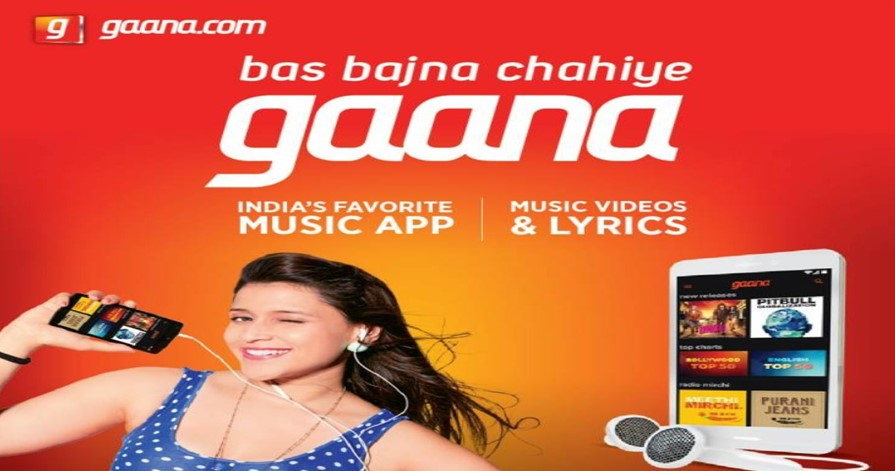

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CREATING A DATAFRAME

In [2]:
df = pd.read_csv(r'C:\Users\MOUSAM KUMAR\Documents\My Data Sources\Gaana-Data-Analysis-main\songs.csv')

## FIRST HAND ANALYSIS ABOUT THE DATASET

In [3]:
# WHAT ARE FIRST 5 RECORDS OF THE DATASET

In [4]:
df.head(5)

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


In [5]:
# WHAT ARE THE NUMBER OF ROWS AND COLUMNS

In [6]:
df.shape

(41355, 6)

In [7]:
# IS THERE ANY MISSING VALUES IN THE DATASET?

In [8]:
df.isnull().sum()

name         0
singer       0
singer_id    0
duration     0
link         0
language     0
dtype: int64

# Data preprocessing

In [9]:
#dealing with duration

In [10]:
duration_lst = []

for duration in df['duration']:
    m = int(duration.split(':')[0])
    n = int(duration.split(':')[1])
    sec = int(duration.split(':')[0])*60 + int(duration.split(':')[1])
    
    duration_lst.append(sec)


In [11]:
len(duration_lst)

41355

In [12]:
len(df)

41355

In [13]:
df['duration'] = duration_lst

In [14]:
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,300,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,386,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,221,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,266,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,339,/hazaron-khwahishen-aisi-1,Urdu


  # Data analysis

## 1. Average Duration of songs throughout the dataset

In [15]:
df['duration'].sum()/len(df['duration'])

295.3130697618184

In [16]:
print('Average duration of song is' , int(df['duration'].mean()) , 'seconds')

Average duration of song is 295 seconds


In [17]:
s= 0
for i in df['duration']:
    s = s + i
print(s/len(df))

295.3130697618184


## 2. Average duration of songs in each language

In [18]:
df.head(1)

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,300,/dil-e-nadan-tujhe-3,Urdu


In [19]:
for i in set(df['language']):
    print(i , int(df[df['language'] == i]['duration'].mean()))

Kannada 250
Malayalam 242
Assamese 228
Hindi 307
Old 307
Marathi 281
Telugu 279
Punjabi 324
Bhojpuri 357
Haryanvi 320
Bengali 255
Odia 257
Gujarati 271
Rajasthani 291
Tamil 270
Urdu 407


## 3 . How many languages of songs are there in the dataset

In [20]:
df['language'].nunique()

16

In [21]:
len(set(df['language']))

16

## 4 . What are all the languages in the dataset ?

In [22]:
s = 0
for i in set(df['language']):
    s += 1
    print(s , i)

1 Kannada
2 Malayalam
3 Assamese
4 Hindi
5 Old
6 Marathi
7 Telugu
8 Punjabi
9 Bhojpuri
10 Haryanvi
11 Bengali
12 Odia
13 Gujarati
14 Rajasthani
15 Tamil
16 Urdu


## 5 . How many songs are there in each languages?

In [23]:
n = 0
for i in df['language']:
    if(i == 'Punjabi'):
        n += 1
print(n)
        

3818


In [24]:
count = []
for i in df['language'].unique():
    l = (df['language'] == i).sum()
    count.append([i,l])
count = pd.DataFrame(count , columns=('language','no_of_songs'))

In [25]:
count.head(10)

,language,no_of_songs
0,Urdu,3116
1,Gujarati,2115
2,Tamil,4677
3,Kannada,3559
4,Rajasthani,541
5,Haryanvi,228
6,Punjabi,3818
7,Hindi,4993
8,Old,4993
9,Malayalam,479


([<matplotlib.patches.Wedge at 0x285c2a8d2e0>,
 [Text(1.0693258537280639, 0.25795778443138245, 'Urdu'),
  Text(0.8861709673640141, 0.6516908903775837, 'Gujarati'),
  Text(0.44927980901982884, 1.0040655622055297, 'Tamil'),
  Text(-0.22383720690973902, 1.0769850996196961, 'Kannada'),
  Text(-0.5431108181494693, 0.95657233872249, 'Rajasthani'),
  Text(-0.5980338064679519, 0.9232310470957162, 'Haryanvi'),
  Text(-0.8493249764769505, 0.699032963695152, 'Punjabi'),
  Text(-1.0997952334879328, 0.021223675393850488, 'Hindi'),
  Text(-0.8128302908632208, -0.7411524257905469, 'Old'),
  Text(-0.444316419129875, -1.00627179215737, 'Malayalam'),
  Text(-0.02469075950868992, -1.0997228589034984, 'Marathi'),
  Text(0.7203870377220901, -0.8312896702606091, 'Telugu'),
  Text(1.010660044373726, -0.4342421843931084, 'Odia'),
  Text(1.0524894931875184, -0.31979034808743234, 'Bhojpuri'),
  Text(1.0779525743747398, -0.2191306628449597, 'Assamese'),
  Text(1.0970883100950664, -0.07998274721933311, 'Bengali')

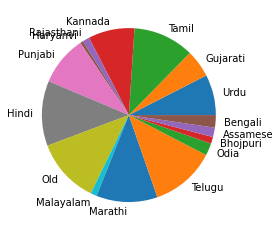

In [26]:
plt.pie(
x = count['no_of_songs'],
labels=count['language']
)


## 6. how many singers are there in the music industry?

In [27]:
all_singers = []
for i in df['singer']:
    all_singers += i.split('|')
print('Total number of unique singers are' , len(set(all_singers)))

Total number of unique singers are 3940


## 7. which singer has played most number of songs?

In [65]:
abcd = []
for i in set(all_singers):
    c=0
    for j in (df['singer']):
        if(i in j):
            c+=1
    abcd.append([i,c]) 

In [72]:
songdf = pd.DataFrame(abcd , columns = ['singer','No of songs'])
songs = songdf.sort_values('No of songs' , ascending = False).head(20)
songs

,singer,No of songs
46,S. P. Balasubrahmanyam,3659
150,Lata Mangeshkar,3056
131,Asha Bhosle,2715
146,Kishore Kumar,2401
11,Mohammed Rafi,2133
0,Chorus,1154
13,Mahendra Kapoor,816
138,Anuradha Paudwal,707
111,Mukesh,657
113,Manna Dey,471


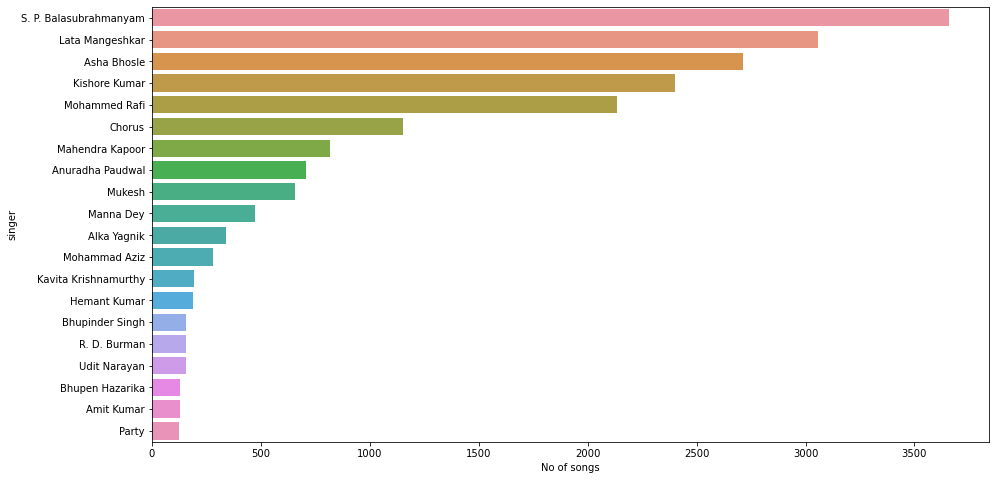

In [80]:
plt.figure(figsize=(15,8))
g= sns.barplot(x='No of songs',y='singer',data = songs)

## 8. singer who played most number of songs in each language

In [31]:
data = []
for i in df['language'].unique():
    df1 = df[df['language'] == i]
    all_singers = []
    for j in df1['singer']:
        all_singers += j.split('|')
    data.append([i,len(set(all_singers)),len(df1)])


In [32]:
data = pd.DataFrame(data , columns = ['language' , 'total number of singers' , 'number of songs'])
data.sort_values('total number of singers' , ascending = False) 

,language,total number of singers,number of songs
6,Punjabi,636,3818
10,Marathi,569,4699
7,Hindi,515,4993
8,Old,515,4993
2,Tamil,510,4677
0,Urdu,385,3116
3,Kannada,379,3559
11,Telugu,369,4996
1,Gujarati,303,2115
12,Odia,243,940


## How many songs in each language were created? 

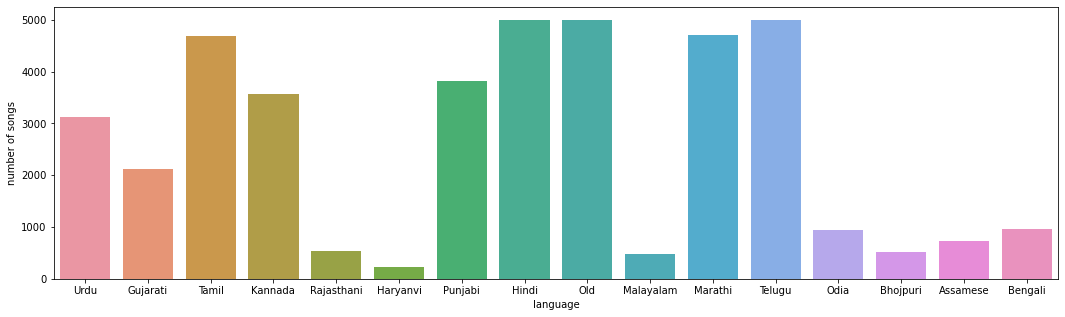

In [81]:
plt.figure(figsize=(18,5))
g= sns.barplot(x='language',y='number of songs',data = data)

## In each language how many singers are available

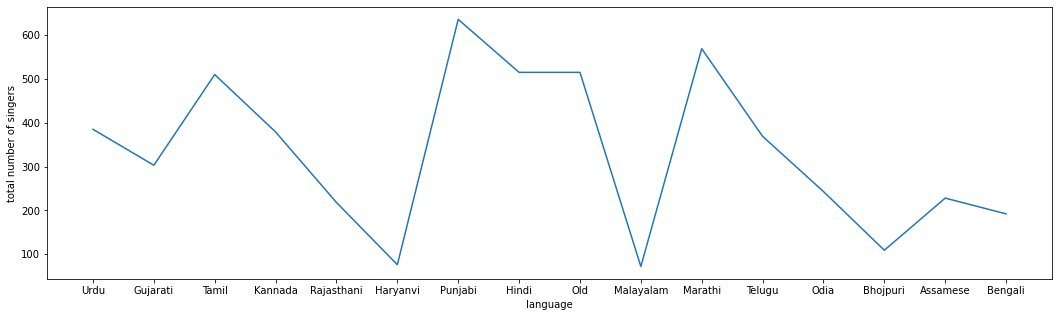

In [34]:
plt.figure(figsize=(18,5))
g= sns.lineplot(x='language',y='total number of singers',data = data)